# import librarys

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read data

In [2]:
dataset = pd.read_csv("insurance.csv")

In [3]:
df = pd.DataFrame(dataset)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: This column represents the age of the primary beneficiary, likely referring to the age of the insured individual.

sex: Here, the dataset includes information about the gender of the insurance contractor, with possible values being "female" or "male."

bmi: The BMI, or Body Mass Index, is provided as an indicator of body weight. It offers insights into whether an individual's weight is relatively high or low compared to their height. The BMI is computed as weight in kilograms divided by the square of height in meters. Ideally, a BMI falls within the range of 18.5 to 24.9 to indicate a healthy weight.

children: This column reflects the number of children covered by health insurance or, more broadly, the number of dependents for the primary beneficiary.

smoker: The dataset includes information about whether the individual is a smoker or a non-smoker, which is a significant factor in health insurance considerations.

region: It specifies the beneficiary's residential area in the United States and includes regions like northeast, southeast, southwest, and northwest.

charges: This column contains data regarding individual medical costs billed by health insurance, which is a fundamental aspect of health insurance analysis and evaluation.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

###  preprossecing culmns

In [9]:
df_preprossed = df.copy()

In [10]:
df_preprossed['smoker']=df_preprossed['smoker'].apply(lambda x :1 if x=='yes' else 0)
df_preprossed['sex']=df_preprossed['sex'].apply(lambda x :1 if x=='male' else 0)

In [11]:
# region_cat = pd.DataFrame(df['region'])

In [12]:
# from sklearn.preprocessing import OneHotEncoder

# oh_encode = OneHotEncoder()
# region_cat_1hot = oh_encode.fit_transform(region_cat)

In [13]:
# region_cat_1hot.toarray()

In [14]:
# oh_encode.categories_

In [15]:
region_cat_1hot = pd.get_dummies(df_preprossed['region'],dtype=int)

In [16]:
df_preprossed.drop('region',axis=1,inplace=True)

In [17]:
df_preprossed = df_preprossed.join(region_cat_1hot)

In [18]:
df_preprossed.corr(numeric_only=True)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


# plot

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='sex', ylabel='age'>,
        <Axes: xlabel='bmi', ylabel='age'>,
        <Axes: xlabel='children', ylabel='age'>,
        <Axes: xlabel='smoker', ylabel='age'>,
        <Axes: xlabel='charges', ylabel='age'>,
        <Axes: xlabel='northeast', ylabel='age'>,
        <Axes: xlabel='northwest', ylabel='age'>,
        <Axes: xlabel='southeast', ylabel='age'>,
        <Axes: xlabel='southwest', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='sex'>,
        <Axes: xlabel='sex', ylabel='sex'>,
        <Axes: xlabel='bmi', ylabel='sex'>,
        <Axes: xlabel='children', ylabel='sex'>,
        <Axes: xlabel='smoker', ylabel='sex'>,
        <Axes: xlabel='charges', ylabel='sex'>,
        <Axes: xlabel='northeast', ylabel='sex'>,
        <Axes: xlabel='northwest', ylabel='sex'>,
        <Axes: xlabel='southeast', ylabel='sex'>,
        <Axes: xlabel='southwest', ylabel='sex'>],
       [<Axes: xlabel='age', ylabel='bmi'>,
  

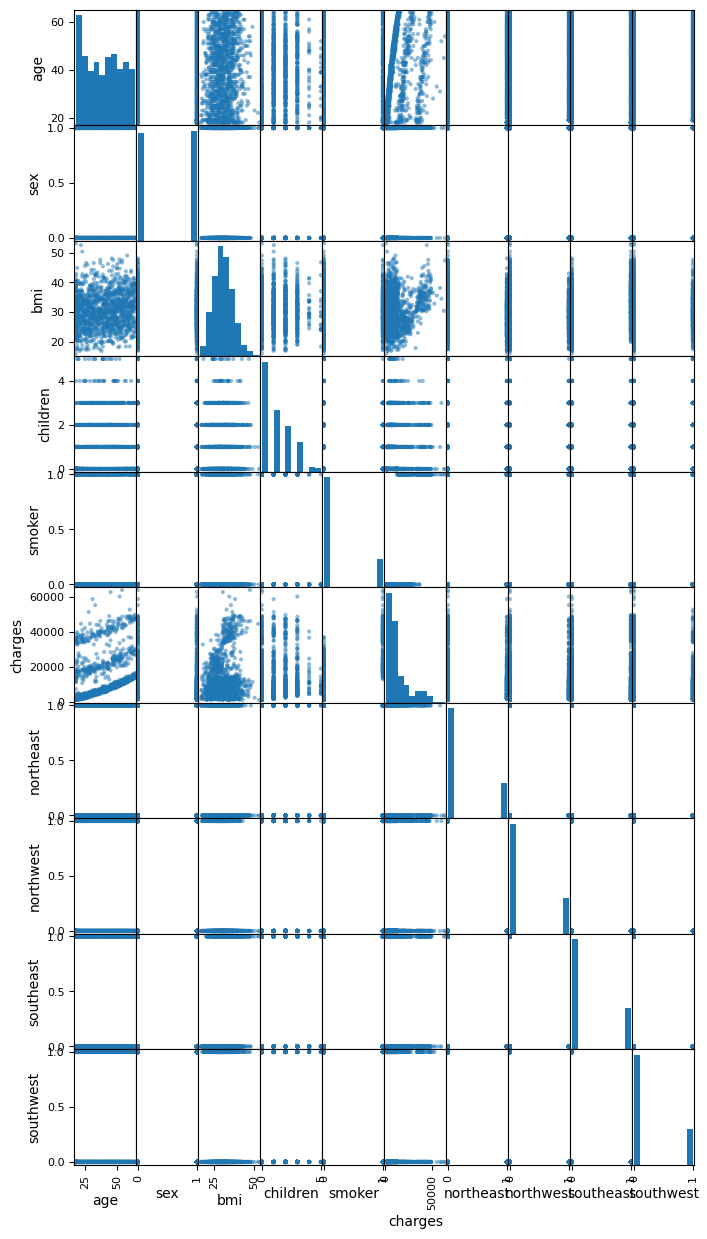

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_preprossed ,figsize=(8,15))

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

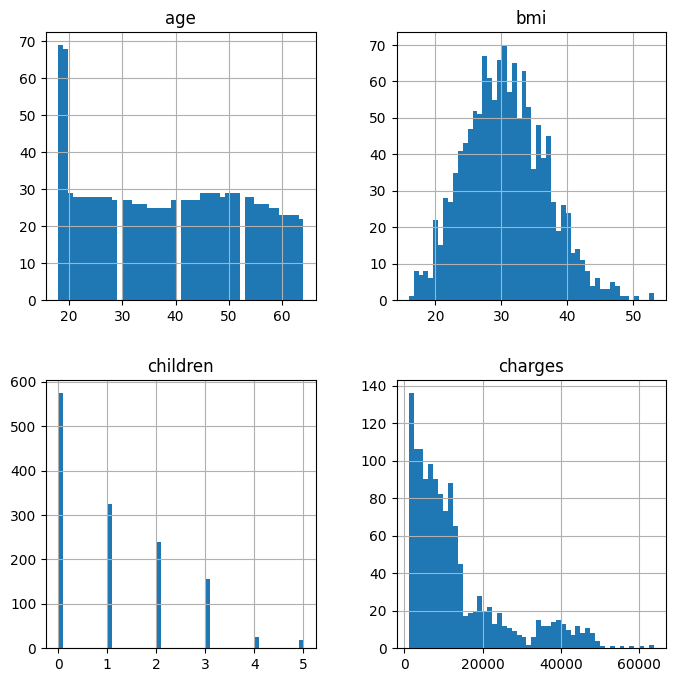

In [20]:
df.hist(bins=50,figsize=(8,8))

<Axes: >

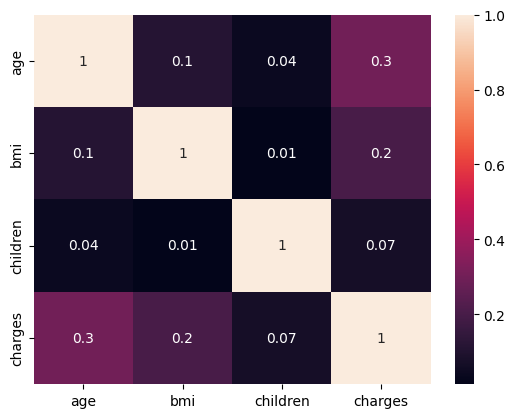

In [21]:
sns.heatmap(df.corr(numeric_only=True),fmt='.1g',annot=True)    

<Axes: >

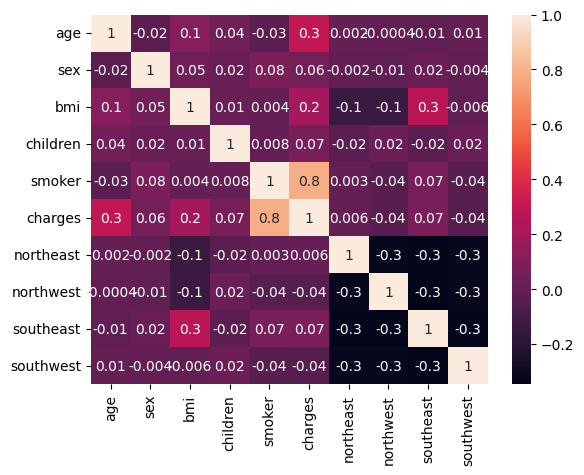

In [22]:
sns.heatmap(df_preprossed.corr(numeric_only=True),fmt='.1g',annot=True)    

# train and test split 

In [34]:
df_preprossed.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [25]:
from sklearn.model_selection import train_test_split

In [30]:
x = df_preprossed.drop('charges',axis=1)
y = df_preprossed['charges']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

# scaling 

In [35]:
# from sklearn.preprocessing import scale

In [39]:
# x_train_scale = scale(x_train)
# x_test_scale = scale(x_test)

# model

In [43]:
from sklearn import linear_model

In [46]:
lr = linear_model.LinearRegression()

In [58]:
lr.fit(x_train,y_train)

LinearRegression()

In [59]:
y_predict = lr.predict(x_test)

# Valuate 

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [61]:
mean_absolute_error(y_test,y_predict)

4181.194473753641

In [62]:
mean_squared_error(y_test,y_predict)

33596915.851361446

In [63]:
r2_score(y_test,y_predict)

0.7835929767120724

In [64]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
109     47055.53210
575     12222.89830
535      6067.12675
543     63770.42801
846      9872.70100
Name: charges, Length: 268, dtype: float64

In [65]:
y_predict

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084137, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      